# Import Third-Party Library Numpy

In [1]:
import numpy as np

# Identity Function : 

Return the same content of the input

In [2]:
def indentity_function(x):
    return x

# Step Function:

Return 1 when input is bigger than 1, return 0 when input is equal or smaller than 0.  
The return type is  int numpy array.

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

# Sigmoid

A mathematical function with the shape of "S".
https://en.wikipedia.org/wiki/Sigmoid_function

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Gradient

The derivative of sigmoid function.
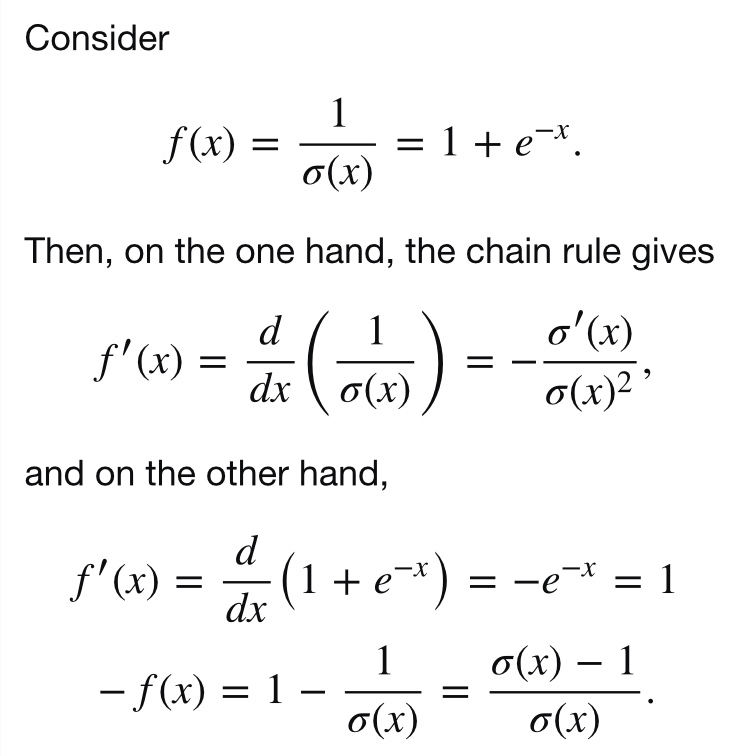

In [5]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

# Relu Function  

Rectified Linear Unit(ReLU)
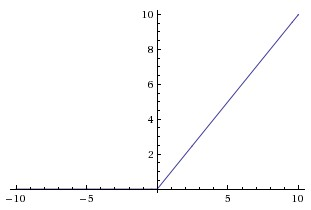

In [6]:
def relu(x):
    return np.maximum(0, x)

# Relu Gradient

The derivative of sigmoid function.

In [7]:
def relu_grad(x):
    grad = np.zeros(x)
    grad[x >= 0] = 1
    return grad

# Softmax

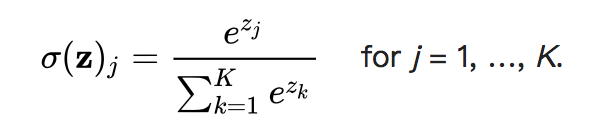

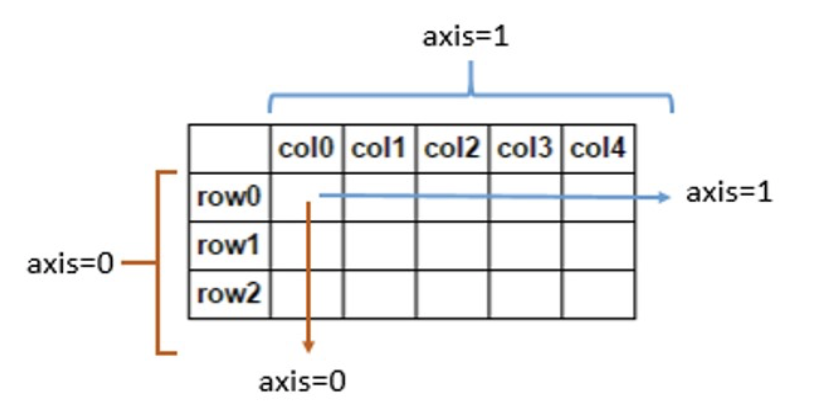

In [8]:
def softmax(x):
    if x.ndim == 2: # The Dimension of the numpy array is 2
        x = x.T  # Transport of x  
        x = x - np.max(x, axis = 0) # axis = 0 : Row 
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        return y.T
    
    x = x - np.max(x) # Else the Dimension of the numpy array is 1
    return np.exp(x) / np.sum(np.exp(x))

# Mean Square Error

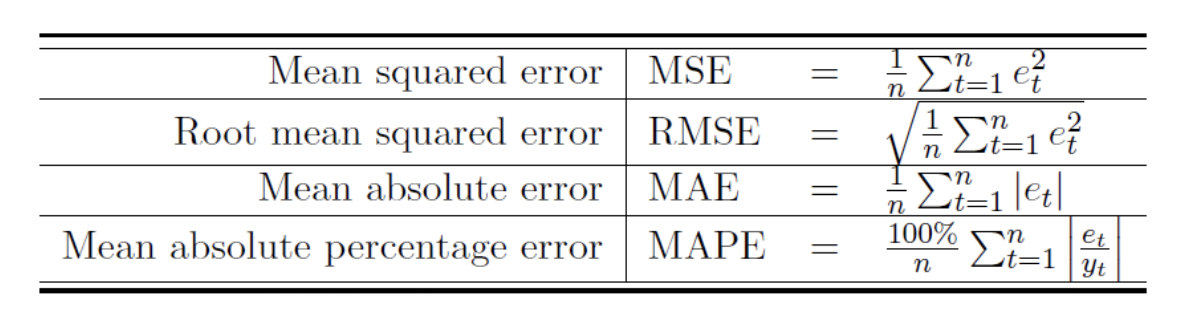

In [9]:
def mean_square_error(y, t):
    return np.exp(x) / np.sum(np.exp(x))

# Cross Entropy Error

https://en.wikipedia.org/wiki/Cross_entropy

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1) # axis = 1 : Column
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # t is used as one-hot 

# Softmax Loss

In [11]:
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

# Numerical Gradient

About the detail of numpy nditer
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.nditer.html

In [12]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# Two Layer Net Model 

The Module is Implemented in Class

In [13]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {} #declare as dictionary
        self.params['W1']  = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1']   = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2']  = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1,  b2  = self.params['b1'],  self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
            y = self.predict(x)
            return cross_entropy_error(y, t)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1']  = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# Deep Learn MNIST One Time with a Small Set of Data

In [14]:
# Import MNIST Data
import sys, os
sys.path.append(r"/Users/jy/Desktop/deep-learning-from-scratch-master/"); # Import Function
from dataset.mnist import load_mnist

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

In [16]:
train_loss_list = []

In [17]:
# Global Values
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [18]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [19]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

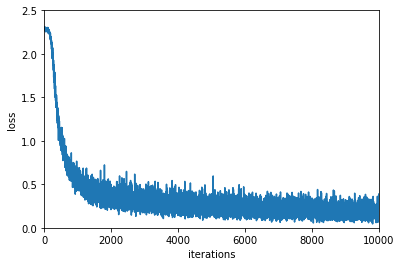

In [21]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.axis([0, 10000, 0, 2.5])
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()